In [9]:
import numpy as np

# generate distribution over the number of events in n_windows independent windows
# 
# the maximal number of events per site is n_label-1 
# the maximal total number of events is (n_labels-1)*n_windows

n_windows = 344
n_labels = 50  

p_count = np.random.uniform(low=0,high=1,size=(n_labels,n_windows))
p_count = p_count / np.sum( p_count, axis=0)

print(p_count)
print(p_count.shape)

[[0.02943374 0.01861093 0.03091977 ... 0.01118386 0.01730017 0.03405661]
 [0.0310803  0.039744   0.02524426 ... 0.03630558 0.03633529 0.00660934]
 [0.02169904 0.03934844 0.01966762 ... 0.03079717 0.01949667 0.0337869 ]
 ...
 [0.02713561 0.01351072 0.02155331 ... 0.00479765 0.02018069 0.02138371]
 [0.00396922 0.02792715 0.0237571  ... 0.01320121 0.00974846 0.00459709]
 [0.03476455 0.02692313 0.01339912 ... 0.03668461 0.00681734 0.03570337]]
(50, 344)


8416


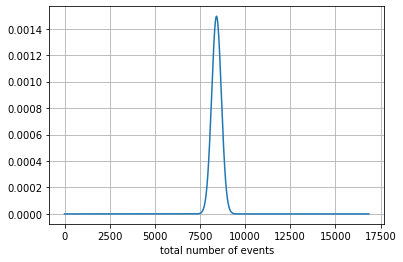

In [10]:
from scipy.special import logsumexp
import matplotlib.pyplot as plt

def total_count_distribution( p_count ):
    """ 
    Input:
      p_c [n_labels x n_windows] 
    Output:
      distr [n_windows*(n_labels-1)] distr[c] is the probability 
        that the total number of events is c 
    """

    n_labels, n_windows = p_count.shape

    log_p_count = np.log( p_count )
    log_P = np.zeros(((n_labels-1)*n_windows+1, n_windows ))
    log_P.fill( np.NINF )

    for s in range(n_labels):
        log_P[s,n_windows-1] = np.log( p_count[s,n_windows-1])
        
    for i in range( n_windows-2,-1,-1 ):
        for s in range( (n_windows-i)*(n_labels-1)+1 ):
            a = []
            for c in range( max(s-(n_windows-i-1)*(n_labels-1), 0), min(n_labels, s+1 ) ):
                a.append( log_p_count[c,i] + log_P[s-c,i+1])
            log_P[s,i] = logsumexp( a )

    return np.exp(log_P[:,0]) 


distr = total_count_distribution( p_count )

plt.figure()
plt.plot( distr )
plt.grid('on')
plt.xlabel('total number of events')

print(np.argmax( distr ))

In [11]:
# argmax inference
pred_labels = np.argmax( p_count, axis=0)
pred_count_indep_map = np.sum( pred_labels )

# optimal RVCE predictor
max_total_count = (n_labels-1)*n_windows
rvce_risk = np.zeros( max_total_count )
count_range = np.arange( 1, max_total_count+1 )
for c in range( 1, max_total_count+1 ):
    rvce_risk[c-1] = np.sum(  distr[1:]*np.abs(count_range-c)/count_range  )

pred_count_rvce = np.argmin( rvce_risk ) + 1
pred_count_map = np.argmax( distr )

print( pred_count_rvce )
print( pred_count_map )
print( pred_count_indep_map )


8407
8416
8450


In [5]:
pred_count_rvce

2450